<a href="https://colab.research.google.com/github/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/blob/main/Analisis_del_consumo_del_cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección nueva

# **Proyecto Final - Visualizaciones en Python**

Primera Entrega




# Abstract

El Data set seleccionado de Kaggle contiene el consumo de café, el mismo fue modificado utilizando datos de los consumidores de Argentina.
En los últimos años se ha desarrollado la creación de cafés de especialidades, evidenciando de esta manera el aumento de consumo de este producto en los argentinos, se observa una evolución en los hábitos, con un crecimiento en el consumo fuera del hogar a través de cafeterías y estaciones de servicio, la expansión de formatos como las cápsulas y el auge del café de especialidad, que responde a consumidores más exigentes y consciente
Para el análisis de este data set se han propuesto varios paradigmas, para verificar a que corresponde el aumento de consumo, analizando los lugares elegidos, las preferencias en cuanto al tipo de café, la hora más elegida en el momento de tomarlo  , se analizó si la profesión o la vocación de ellos ejercen poder en su elección , así como si las promociones están relacionadas con la elección de compra.
El café resiste: se adapta al precio, al cambio de rutinas y a las nuevas formas de consumo. Se transforma en un punto de encuentro, en una pausa necesaria o en una elección personal cargada de sentido.
A través de este análisis se busca crear conocimiento del consumidor típico de café, de manera de conocerlo y crear negocios inteligentes apuntando a las elecciones que se presentan con mayor frecuencia ,verificando cual es su principal motivo a la hora de comprar café.




**Preguntas:**

1-Cual es el medio de Pago mas utilizado

2-Cual es la hora del dia que mas se consume cafe

3-Cual es la Bebida mas elegidas segun los consumidores



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Leer un archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Data science/DATA SET CAFE.csv',sep=";")
df.columns = df.columns.str.strip()
print(df.columns.tolist())
modo = df["Profesion"].mode()[0]
df["Profesion"] = df["Profesion"].fillna(modo)
print(df["Profesion"].isna().sum())
print (df.head())


['Hora del dia', 'Tipo de Tienda', 'Medio de pago', 'precio', 'Nombre del Café', 'Momento del dia', 'Dia de la semana', 'Mes', 'Dia', 'Num de Mes', 'Date', 'Profesion']
0
   Hora del dia        Tipo de Tienda         Medio de pago  precio  \
0            10            Mc donalds     Tarjeta de Debito    3500   
1            12  café de especialidad    Tarjeta de credito    4500   
2            12             Starbucks    Tarjeta de credito    4500   
3            13                Kiosco  Billeteras virtuales    2000   
4            13             Starbucks    Tarjeta de credito    4500   

  Nombre del Café Momento del dia Dia de la semana  Mes  Dia  Num de Mes  \
0           Latte         Morning              Fri  Mar    5           3   
1   Hot Chocolate       Afternoon              Fri  Mar    5           3   
2   Hot Chocolate       Afternoon              Fri  Mar    5           3   
3       Americano       Afternoon              Fri  Mar    5           3   
4           Latte     

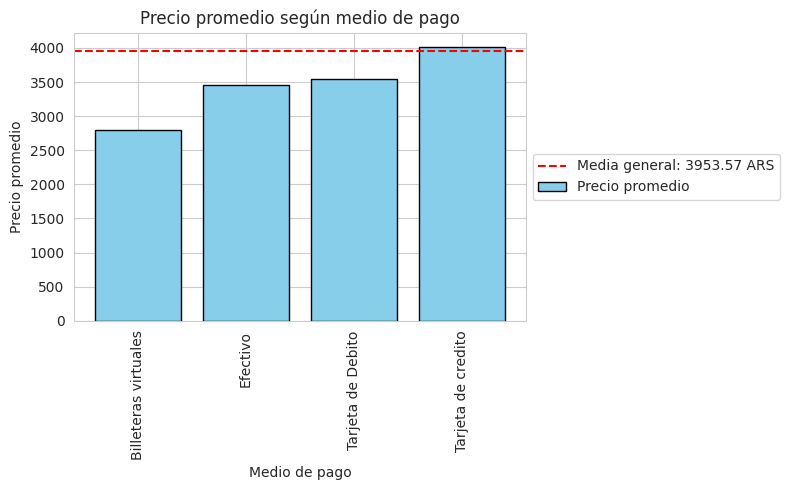

=== Resumen del gráfico de precio promedio por medio de pago ===
Precio promedio general: 3953.57 ARS
Medio de pago con mayor precio promedio: Tarjeta de credito (4020.02 ARS)
Medio de pago con menor precio promedio: Billeteras virtuales (2795.49 ARS)

Promedios por medio de pago:
Medio de pago
Billeteras virtuales    2795.488722
Efectivo                3450.617284
Tarjeta de Debito       3542.857143
Tarjeta de credito      4020.018309
Name: precio, dtype: float64


In [27]:

promedios = df.groupby("Medio de pago")["precio"].mean()
media_general = df["precio"].mean()

plt.figure(figsize=(8,5))
bars = plt.bar(promedios.index, promedios.values, color="skyblue", edgecolor="black", label="Precio promedio")
plt.axhline(media_general, color="red", linestyle="--", label=f"Media general: {media_general:.2f} ARS")
plt.title("Precio promedio según medio de pago")
plt.xlabel("Medio de pago")
plt.ylabel("Precio promedio")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
medio_max = promedios.idxmax()
medio_min = promedios.idxmin()
precio_max = promedios.max()
precio_min = promedios.min()
promedio_general = df["precio"].mean()
print("=== Resumen del gráfico de precio promedio por medio de pago ===")
print(f"Precio promedio general: {promedio_general:.2f} ARS")
print(f"Medio de pago con mayor precio promedio: {medio_max} ({precio_max:.2f} ARS)")
print(f"Medio de pago con menor precio promedio: {medio_min} ({precio_min:.2f} ARS)")
print("\nPromedios por medio de pago:")
print(promedios)





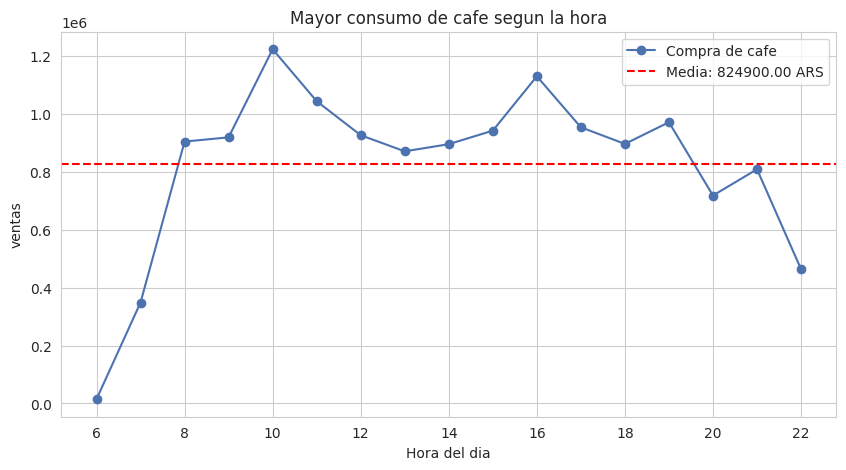

In [30]:

import plotly.express as px

gasto_diario = df.groupby("Hora del dia")["precio"].sum()
media_diaria = gasto_diario.mean()
sns.set_style("whitegrid")
sns.set_palette("deep")


plt.figure(figsize=(10,5))
plt.plot(gasto_diario.index, gasto_diario.values, marker="o", label="Compra de cafe")
plt.axhline(media_diaria, color="red", linestyle="--", label=f"Media: {media_diaria:.2f} ARS")
plt.title("Mayor consumo de cafe segun la hora")
plt.xlabel("Hora del dia")
plt.ylabel("ventas")
plt.grid(True)
plt.legend()

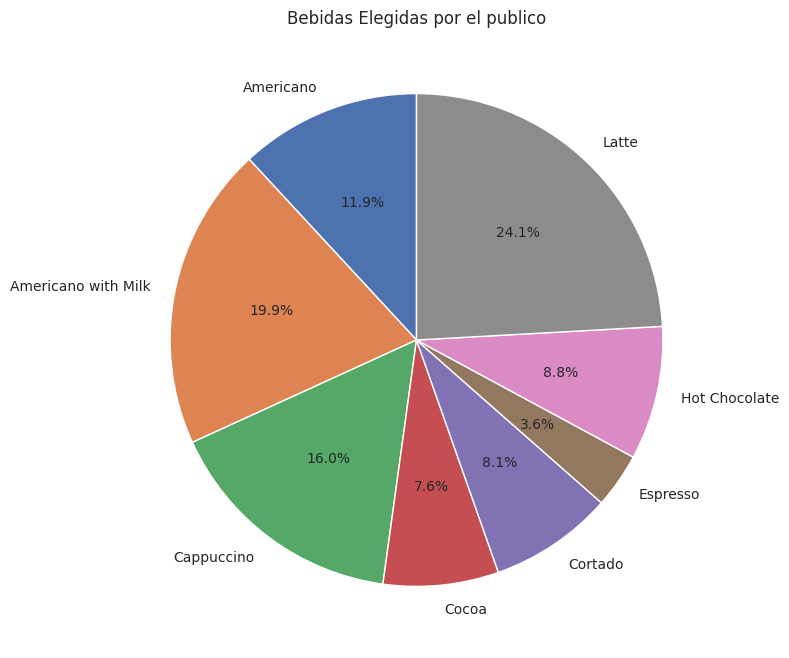

In [31]:

gasto_por_tienda = df.groupby("Nombre del Café")["precio"].sum()
sns.set_style("whitegrid")
sns.set_palette("deep")

# Graficar pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gasto_por_tienda,
    labels=gasto_por_tienda.index,
    autopct="%1.1f%%",  # mostrar porcentajes
    startangle=90
)
plt.title("Bebidas Elegidas por el publico")
plt.show()





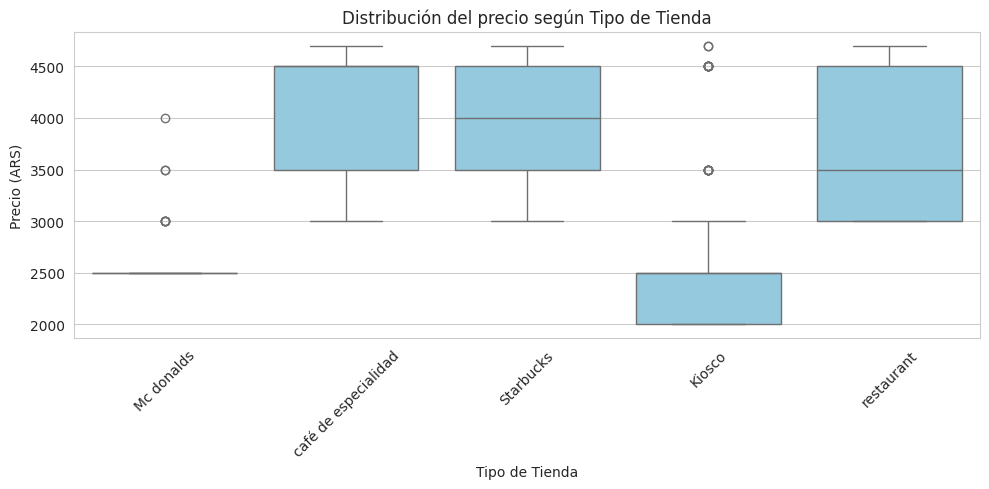

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas categóricas a comparar con el precio
categoricas = ["Tipo de Tienda"]


# Crear un gráfico para cada variable categórica
for col in categoricas:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y="precio", data=df,color="skyblue")
    plt.title(f"Distribución del precio según {col}")
    plt.xlabel(col)
    plt.ylabel("Precio (ARS)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


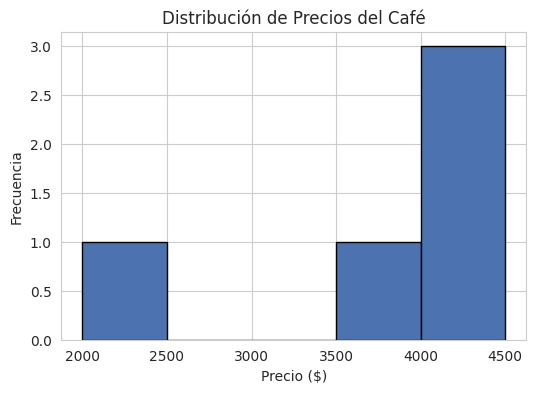

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
data = {"Hora del dia": [10, 12, 12, 13, 13],
    "Tipo de Tienda": ["Mc donalds", "café de especialidad", "Starbucks", "Kiosco", "Starbucks"],
    "Medio de pago": ["Tarjeta de Debito", "Tarjeta de credito", "Tarjeta de credito", "Billeteras virtuales", "Tarjeta de credito"],
    "Precio": [3500, 4500, 4500, 2000, 4500],
    "Nombre del Café": ["Latte", "Hot Chocolate", "Hot Chocolate", "Americano", "Latte"],
    "Momento del dia": ["Morning", "Afternoon", "Afternoon", "Afternoon", "Afternoon"],
    "Dia de la semana": ["Fri", "Fri", "Fri", "Fri", "Fri"],
    "Mes": ["Mar", "Mar", "Mar", "Mar", "Mar"],
    "Dia": [5, 5, 5, 5, 5],
    "Num de Mes": [3, 3, 3, 3, 3],
    "Date": ["1/3/2024", "1/3/2024", "1/3/2024", "1/3/2024", "1/3/2024"],
    "Profesion": ["trabajo de oficina", "Estudiantes", "Estudiantes", "Estudiantes", "Estudiantes"]
}

df = pd.DataFrame(data)

# --- 1. Histograma de precios ---
plt.figure(figsize=(6,4))
plt.hist(df["Precio"], bins=5, edgecolor="black")
plt.title("Distribución de Precios del Café")
plt.xlabel("Precio ($)")
plt.ylabel("Frecuencia")
plt.show()



<Figure size 600x400 with 0 Axes>

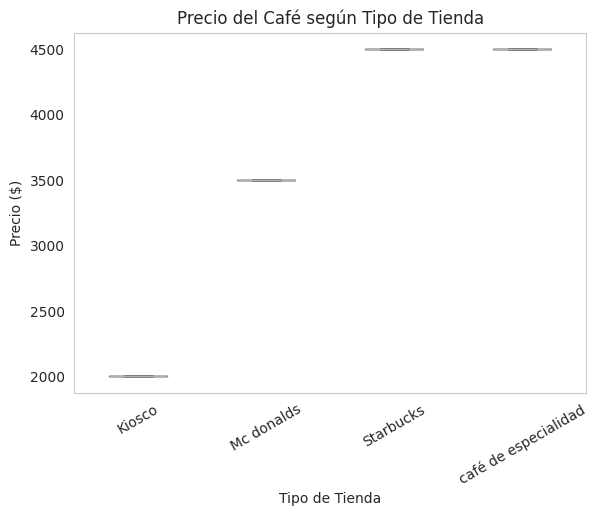

In [34]:
# --- 2. Boxplot de precios por tipo de tienda ---
plt.figure(figsize=(6,4))
df.boxplot(column="Precio", by="Tipo de Tienda", grid=False)
plt.title("Precio del Café según Tipo de Tienda")
plt.suptitle("")
plt.xlabel("Tipo de Tienda")
plt.ylabel("Precio ($)")
plt.xticks(rotation=30)
plt.show()


Conclusiones

el análisis sugiere que:

El precio de los cafés se concentra en el rango alto ($4.500).

El tipo de tienda es un fuerte determinante del precio.

La profesión modula la elección: estudiantes optan por opciones más caras (Starbucks, especialidad), mientras que los oficinistas se inclinan por McDonald’s.


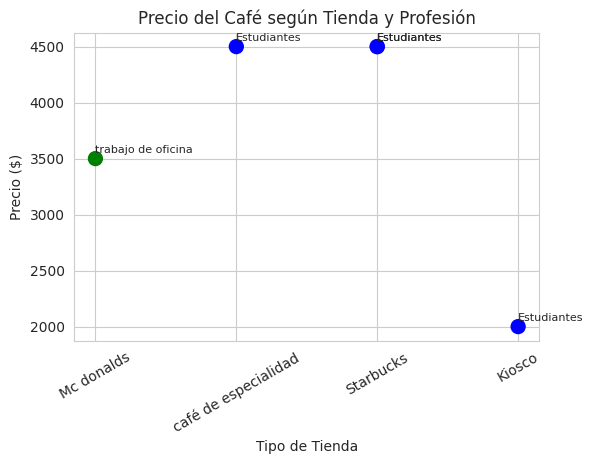

In [35]:
# --- 3. Dispersión Precio vs Tipo de Tienda (color por Profesión) ---
plt.figure(figsize=(6,4))

# Diccionario de colores
prof_color = {
    "Estudiantes": "blue",
    "trabajo de oficina": "green"
}

# Asignar color, si no está en el diccionario → "gray"
colors = df["Profesion"].map(lambda x: prof_color.get(x, "gray"))

plt.scatter(df["Tipo de Tienda"], df["Precio"], c=colors, s=100)

# Etiquetas sobre los puntos
for i, txt in enumerate(df["Profesion"]):
    plt.annotate(txt, (df["Tipo de Tienda"][i], df["Precio"][i]+50), fontsize=8)

plt.title("Precio del Café según Tienda y Profesión")
plt.xlabel("Tipo de Tienda")
plt.ylabel("Precio ($)")
plt.xticks(rotation=30)
plt.show()
